In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [119]:
pd.read_csv("data/suicide_data.csv").head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [120]:
pd.read_csv("data/suicide_data.csv", index_col=0).head()

,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,,,,,,,,,,,
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [124]:
pd.read_csv("data/suicide_data.csv").drop(["country-year"], axis=1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [127]:
# pd.read_csv("data/suicide_data.csv").drop(["country-year"], axis=1).sort_values(by=["year", "country"]).reset_index(drop=True)

In [178]:
df = (
    pd.read_csv("data/suicide_data.csv") #  read the dataframe from csv file
    .drop(["country-year"], axis=1)  #  remove the redundant "country-year" column
    # .reset_index(drop=False)  #  turn the index into a regular column
    .sort_values(by=["year", "country"])  #  sort by year and country
    .reset_index(drop=True)  #  reset the index
)

In [179]:
df.head() 

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


In [180]:
df["age"].value_counts()

age
15-24 years    4642
25-34 years    4642
35-54 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: count, dtype: int64

In [181]:
df["generation"].value_counts()

generation
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: count, dtype: int64

In [182]:
# visualize the basic statistics about the dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [184]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


In [185]:
df.groupby("country").size()

country
Albania                 264
Antigua and Barbuda     324
Argentina               372
Armenia                 298
Aruba                   168
                       ... 
United Arab Emirates     72
United Kingdom          372
United States           372
Uruguay                 336
Uzbekistan              264
Length: 101, dtype: int64

In [186]:
df.groupby("country").size().reset_index(name="count")

,country,count
0,Albania,264
1,Antigua and Barbuda,324
2,Argentina,372
3,Armenia,298
4,Aruba,168
...,...,...
96,United Arab Emirates,72
97,United Kingdom,372
98,United States,372
99,Uruguay,336


In [187]:
# check how much data we have for each country (and sort the result)
df_counts = df.groupby("country").size().reset_index(name="count")

In [188]:
df_counts.head()

,country,count
0,Albania,264
1,Antigua and Barbuda,324
2,Argentina,372
3,Armenia,298
4,Aruba,168


In [189]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


In [190]:
df.groupby("country").size().sort_values(ascending=False)

country
Austria                   382
Mauritius                 382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Cabo Verde                 12
Macau                      12
Mongolia                   10
Length: 101, dtype: int64

/tmp/ipykernel_115486/122811290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='count', ylabel='country'>

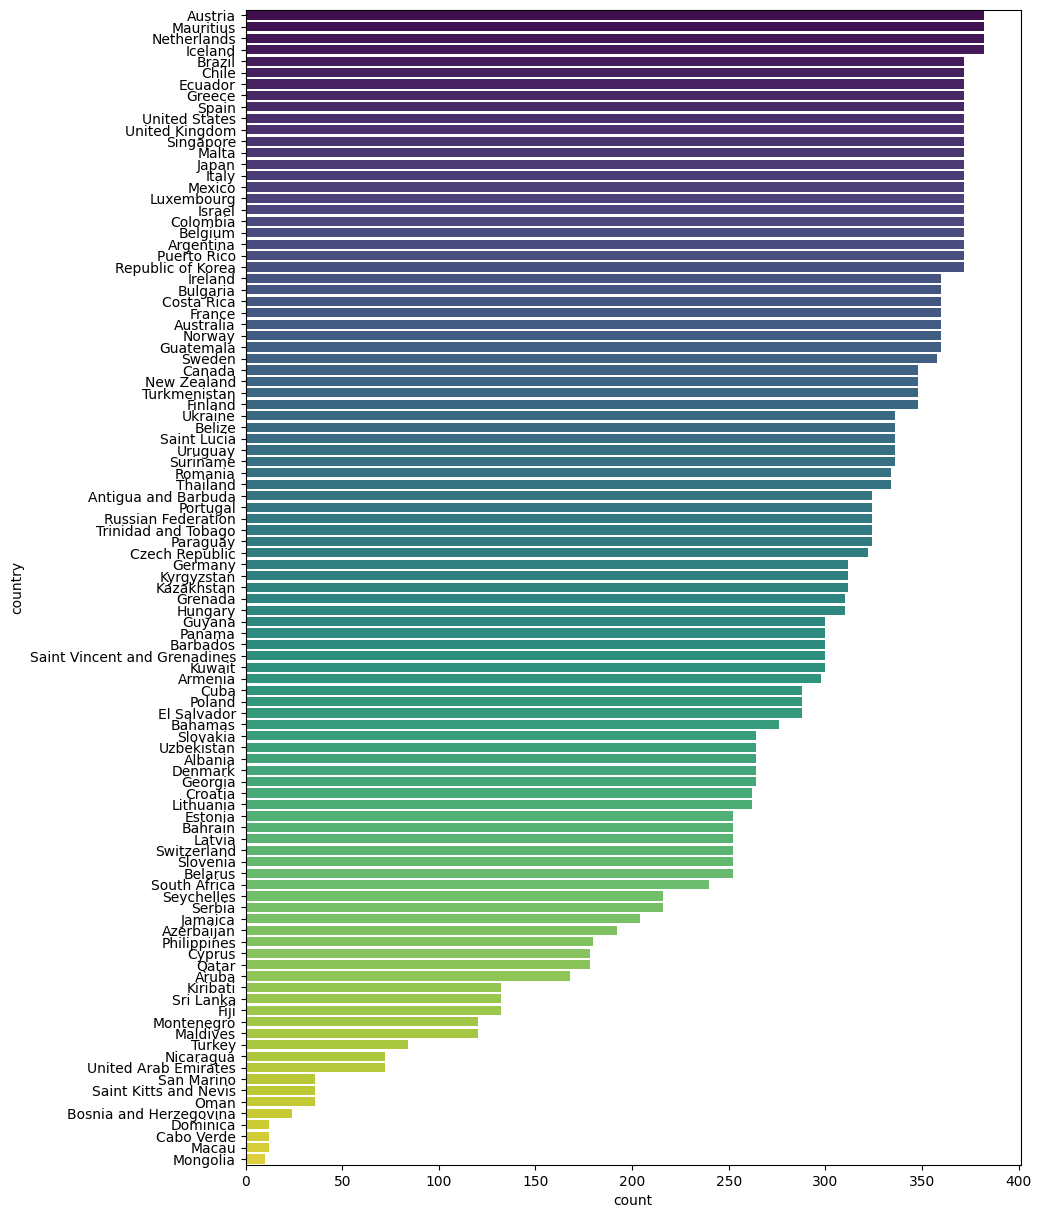

In [191]:
country_counts = df.groupby("country").size()
sorted_countries = country_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 15))
sns.countplot(
    y="country", 
    data=df,
    order=sorted_countries.index,  # Order by count
    palette=sns.color_palette("viridis", len(sorted_countries))  # Color by count
)

In [192]:
df.groupby("country").size().sort_values()

country
Mongolia                   10
Dominica                   12
Macau                      12
Cabo Verde                 12
Bosnia and Herzegovina     24
                         ... 
United States             372
Mauritius                 382
Iceland                   382
Austria                   382
Netherlands               382
Length: 101, dtype: int64

In [193]:
# keep only countries that have at least 100 measurements
MIN_N_MEASUREMENTS = 100
cnt = df.groupby("country").size().sort_values()

In [194]:
cnt[cnt >= MIN_N_MEASUREMENTS]

country
Maldives         120
Montenegro       120
Kiribati         132
Sri Lanka        132
Fiji             132
                ... 
United States    372
Mauritius        382
Iceland          382
Austria          382
Netherlands      382
Length: 90, dtype: int64

In [195]:
countries_filt = cnt[cnt >= MIN_N_MEASUREMENTS].index.tolist()

In [196]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


In [197]:
df.country.isin(countries_filt)

0        True
1        True
2        True
3        True
4        True
         ... 
27815    True
27816    True
27817    True
27818    True
27819    True
Name: country, Length: 27820, dtype: bool

In [198]:
df = df[df.country.isin(countries_filt)]

In [199]:
df.shape

(27414, 11)

In [200]:
df = df[df.country.isin(countries_filt)]
df.country.value_counts()

country
Austria        382
Iceland        382
Netherlands    382
Mauritius      382
Brazil         372
              ... 
Sri Lanka      132
Kiribati       132
Fiji           132
Maldives       120
Montenegro     120
Name: count, Length: 90, dtype: int64

/tmp/ipykernel_115486/44380664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


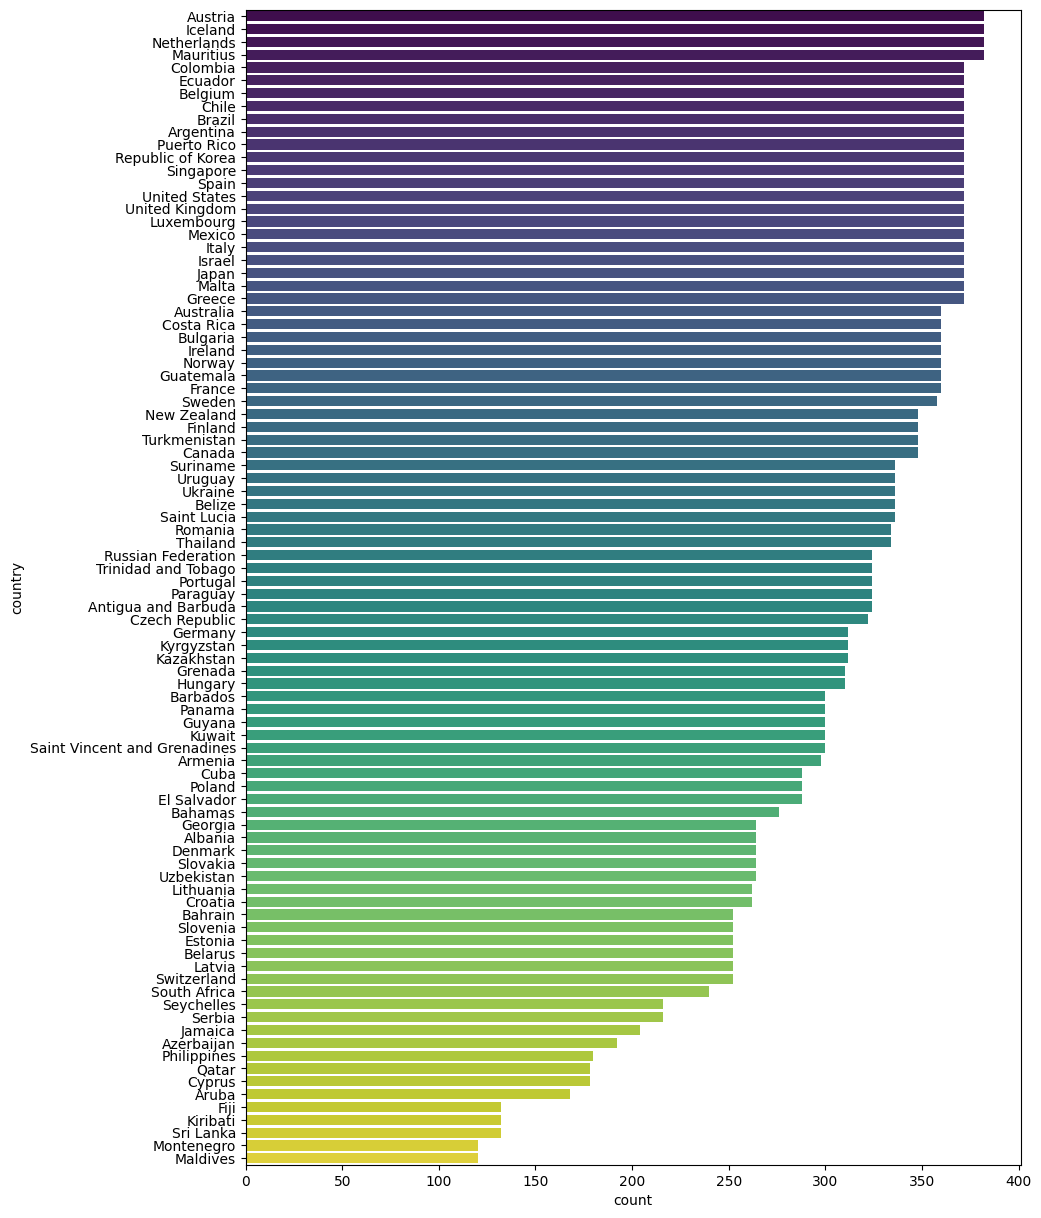

In [201]:
country_counts = df.groupby("country").size()
sorted_countries = country_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 15));
sns.countplot(
    y="country", 
    data=df,
    order=sorted_countries.index,  # 
    palette=sns.color_palette("viridis", len(sorted_countries)) 
)
df.head()

In [202]:
df.head(4)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X


In [203]:
# make "country" column categorical 
# "category"
# .astype()
df.loc[:, "country"] = df.country.astype("category")

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27414 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27414 non-null  object 
 1   year                27414 non-null  int64  
 2   sex                 27414 non-null  object 
 3   age                 27414 non-null  object 
 4   suicides_no         27414 non-null  int64  
 5   population          27414 non-null  int64  
 6   suicides/100k pop   27414 non-null  float64
 7   HDI for year        8172 non-null   float64
 8    gdp_for_year ($)   27414 non-null  object 
 9   gdp_per_capita ($)  27414 non-null  int64  
 10  generation          27414 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [205]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation
5,Antigua and Barbuda,1985,female,75+ years,0,949,0.0,NaN,"240,923,926",3850,G.I. Generation
6,Antigua and Barbuda,1985,male,15-24 years,0,7667,0.0,NaN,"240,923,926",3850,Generation X
7,Antigua and Barbuda,1985,male,25-34 years,0,6194,0.0,NaN,"240,923,926",3850,Boomers
8,Antigua and Barbuda,1985,male,35-54 years,0,5970,0.0,NaN,"240,923,926",3850,Silent
9,Antigua and Barbuda,1985,male,5-14 years,0,7304,0.0,NaN,"240,923,926",3850,Generation X


In [206]:
skupina = df[(df.country == "Antigua and Barbuda") & (df.year == 1985)]
skupina.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation


In [214]:
def spocitat_mnozstvi_lidi(skupina):
    return skupina.sum()

In [208]:
def spocitat_mnozstvi_lidi_apply(skupina):
    skupina.loc[:, "population_total"] = skupina.population.sum()

In [216]:
df["population_total"] = df.groupby(["country", "year"])["population"].transform(spocitat_mnozstvi_lidi)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,population_total
0,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,NaN,"240,923,926",3850,Generation X,62574
1,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,NaN,"240,923,926",3850,Boomers,62574
2,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,NaN,"240,923,926",3850,Silent,62574
3,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,NaN,"240,923,926",3850,Generation X,62574
4,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,NaN,"240,923,926",3850,G.I. Generation,62574


In [ ]:
df.groupby(["country", "year"]).apply(spocitat_mnozstvi_lidi_apply)

/tmp/ipykernel_115486/1201891767.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(["country", "year"]).apply(spocitat_mnozstvi_lidi_apply)


""


In [212]:
df.groupby(["country", "year"]).apply(
    spocitat_mnozstvi_lidi_apply, include_groups=True
)#.reset_index(drop=False)

/tmp/ipykernel_115486/2231994007.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(["country", "year"]).apply(


""


In [217]:
# # create a "population_total" column which equals to the sum of all sex/age categories per country & year

# #def ...()

# # groupby()
# df = df.groupby(["country", "year"]).apply(
#     spocitat_mnozstvi_lidi_apply, include_groups=False
# ).reset_index(drop=False)
# # apply()
# # assign()

# # TODO: prepsat na novy pandas

In [218]:
# create a "gdp_for_year" column which equals to " gdp_for_year ($) " with commas (",") removed
df["gdp_for_year"] = df[" gdp_for_year ($) "].apply(lambda s: float(s.replace(",", "")))
df = df.rename({"suicides/100k pop": "suicide_rate", "gdp_per_capita ($)": "gdp_per_capita"}, axis=1)
df = df.drop(["population", "HDI for year", " gdp_for_year ($) "], axis=1)

In [219]:
df.head()

,country,year,sex,age,suicides_no,suicide_rate,gdp_per_capita,generation,population_total,gdp_for_year
0,Antigua and Barbuda,1985,female,15-24 years,0,0.0,3850,Generation X,62574,240923926.0
1,Antigua and Barbuda,1985,female,25-34 years,0,0.0,3850,Boomers,62574,240923926.0
2,Antigua and Barbuda,1985,female,35-54 years,0,0.0,3850,Silent,62574,240923926.0
3,Antigua and Barbuda,1985,female,5-14 years,0,0.0,3850,Generation X,62574,240923926.0
4,Antigua and Barbuda,1985,female,55-74 years,0,0.0,3850,G.I. Generation,62574,240923926.0


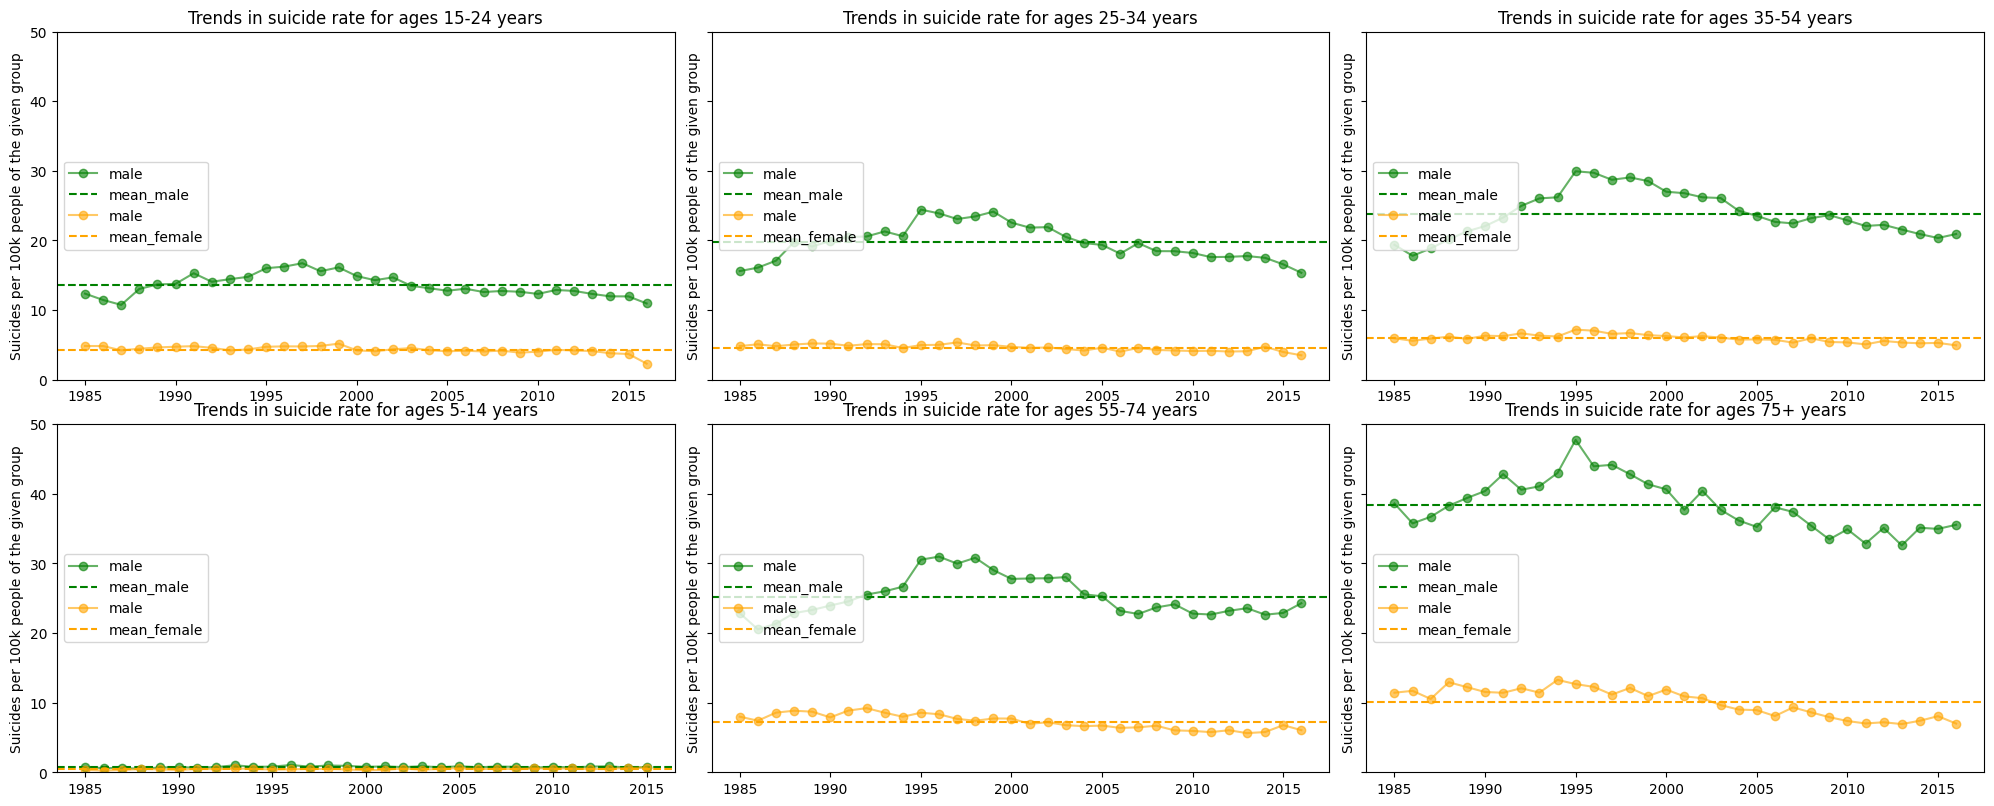

In [98]:
f, axes = plt.subplots(2, 3, figsize=(20, 8), sharey=True)
f.tight_layout()
i = 0
for (age, group) in df.groupby("age"):  # iterating groupby object
    suic_male = group[group["sex"] == "male"].groupby("year")["suicide_rate"].mean()
    suic_female = group[group["sex"] == "female"].groupby("year")["suicide_rate"].mean()
    axes[i//3,i%3].plot(suic_male, marker="o", color="green", alpha=0.6, label="male")
    axes[i//3,i%3].axhline(y=suic_male.mean(), color="green", linestyle="--", label="mean_male")
    axes[i//3,i%3].plot(suic_female, marker="o", color="orange", alpha=0.6, label="male")
    axes[i//3,i%3].axhline(y=suic_female.mean(), color="orange", linestyle="--", label="mean_female")
    axes[i//3,i%3].set_title(f'Trends in suicide rate for ages {age}')
    axes[i//3,i%3].legend(loc=6)
    axes[i//3,i%3].set_ylabel('Suicides per 100k people of the given group')
    axes[i//3,i%3].set_ylim((0, 50))
    i += 1

In [100]:
# UNIVARIATE ANALYSIS OF FEATURES
cat_cols = ['sex', 'age', 'generation']

def plot_pie(df, years=None):
    f, axes = plt.subplots(1, 3, figsize=(20, 3.25));
    if not years:
        f.suptitle('For all historical data')
    else:
        f.suptitle(f'For years {years}')
    for i in range(len(cat_cols)):
        data_pie = df.groupby(cat_cols[i]).suicides_no.sum()
        axes[i].set_title(f'By {cat_cols[i]}');
        axes[i].pie(data_pie, explode=[0.05]*len(data_pie), labels=data_pie.index.tolist())

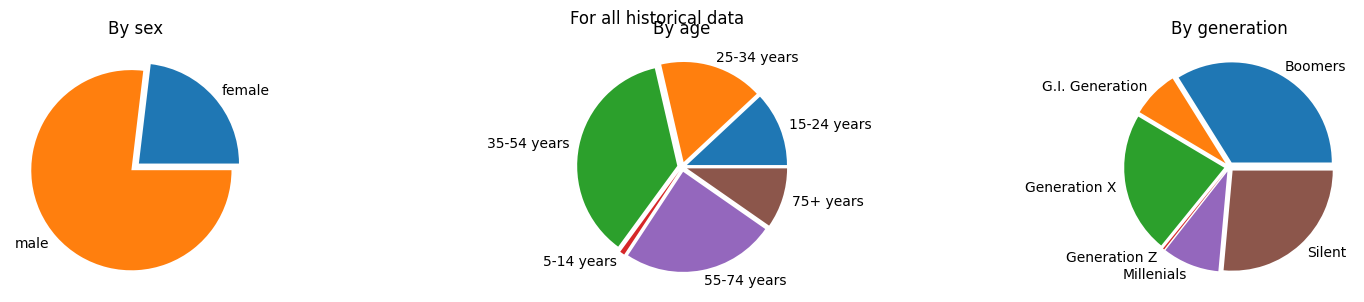

In [101]:
plot_pie(df)

In [102]:
decades = ((df["year"] // 10) * 10).unique().tolist() + [2020]
decades

[1980, 1990, 2000, 2010, 2020]

In [40]:
# Use plot_pie() to plot a separate row of pie charts for each decade

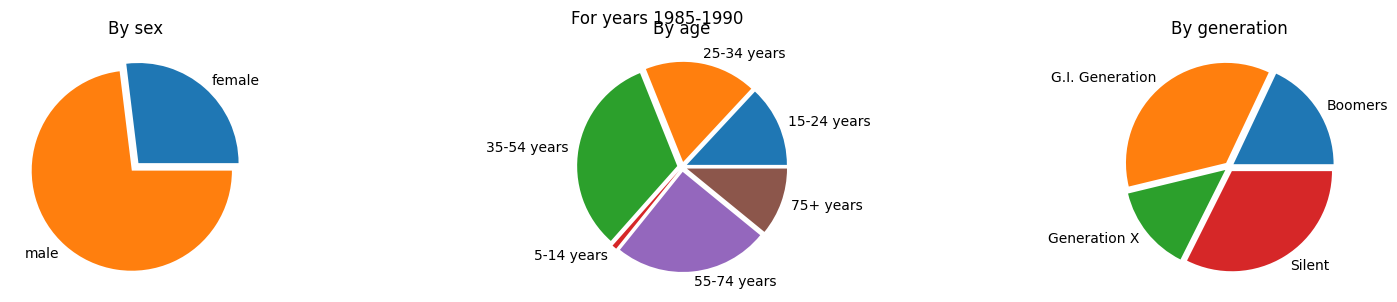

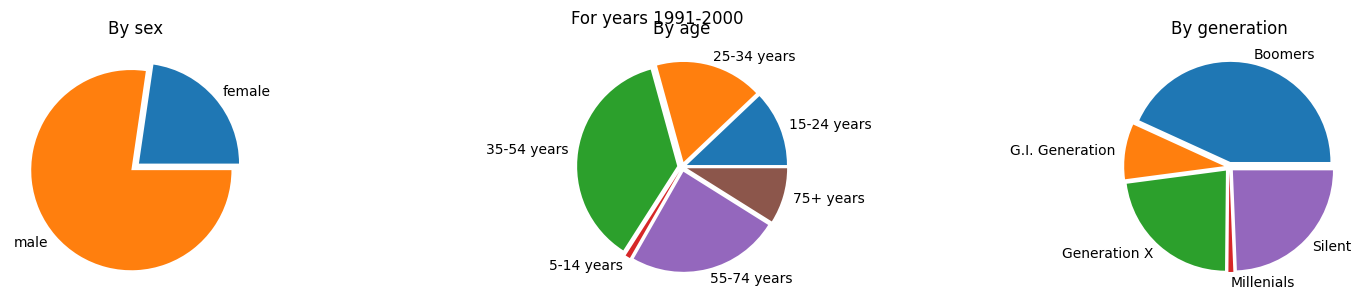

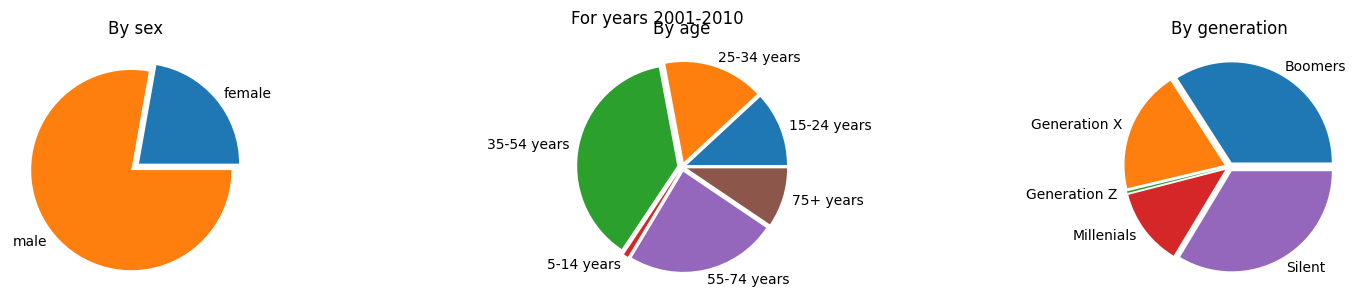

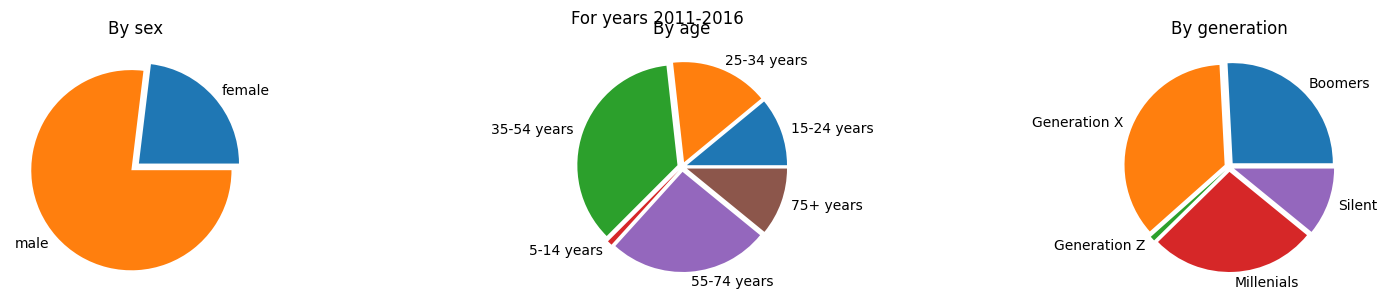

In [103]:
for i in range(len(decades)-1):
    df_dec = df[(df["year"] > decades[i]) & (df["year"] <= decades[i+1])]
    plot_pie(df_dec, years=f'{df_dec["year"].min()}-{df_dec["year"].max()}')

In [109]:
features = df.drop(['suicide_rate'], axis=1).columns.tolist()
features

['country',
 'year',
 'level_2',
 'sex',
 'age',
 'suicides_no',
 'gdp_per_capita',
 'generation',
 'population_total',
 'gdp_for_year']

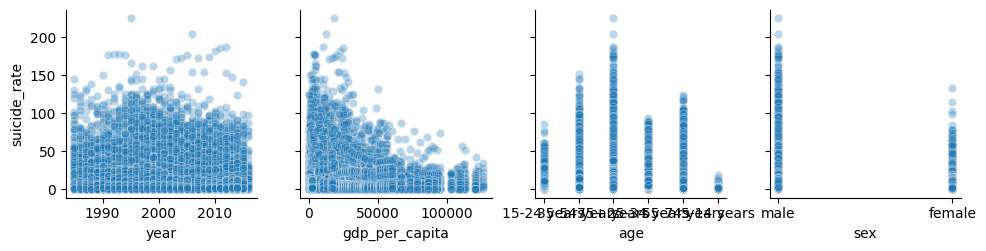

In [118]:
def plot_pair(x_vars):
    sns.pairplot(df, y_vars=['suicide_rate'], x_vars=x_vars, plot_kws={'alpha': 0.3});

plot_pair(["year", "gdp_per_capita", "age", "sex"])